#### 5-load-model-and-piplines-and-predict
Here we load the trained SecureBERT-NER trained model with the pipelines.
we see tprecision, recallshe  metrics and build df with true and pred values, see also the confusion matrix.

in the last section we converte from dnrti labels to category(SecureBERT-NER) labels by :

    "HackOrg": "APT",
    "SecTeam": "SECTEAM",
    "Idus": "IDTY",
    "Org": "IDTY",
    "OffAct": "ACT_OS_TOOL",
    "Way": "ACT_OS_TOOL",
    "Exp": "VULID_VULNAME",
    "Tool": "MAL",
    "SamFile": "FILE",
    "Time": "TIME",
    "Area": "LOC",
    "Purp": "NULL",
    "Features": "NULL",
    "-": "OTHERS"

this map from the description of the assigmnet:
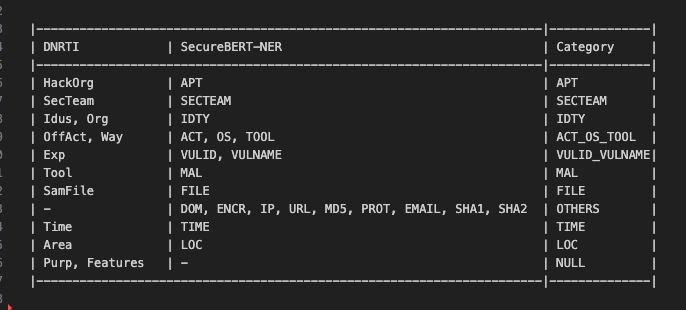

note: every category represent typer of **cluster**

in the end i calculate precision, recalls and confusion matrix for category mapping.

In [1]:
import pickle
from ner_transformers_and_utilities.data_processing_transformers import (
    DatasetFromListTransformer,
    MapAndTokenizeTransformer,
    ReverseTokenizationTransformer,
)
from ner_transformers_and_utilities.functions import split_text_to_words_in_sentences, predict_pre_train_model, calculate_metrics
from transformers import AutoTokenizer, AutoModelForTokenClassification
from safetensors.torch import load_file
import torch
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
model_index = None

In [3]:
# Prepare the input example
input_test_example = '''We observed DDKONG in use between February 2017 and the present, while PLAINTEE is a newer addition with the earliest known sample being observed in October 2017. The RANCOR campaign represents a continued trend of targeted attacks against entities within the South East Asia region.'''



In [4]:

sentences = split_text_to_words_in_sentences(input_test_example)

In [5]:
if model_index == None:
    # fnd the largest model index in the models directory
    import os
    model_index = 0
    for file in os.listdir("models/securebert_ner"):
        if file.startswith("model_"):
            index = int(file.split("_")[1])
            if index > model_index:
                model_index = index
    print("Largest model index found: ", model_index)

Largest model index found:  5


In [6]:
# Load the pipeline_from_predictions_to_labels
with open('pipelines/pipeline_from_predictions_to_labels.pkl', 'rb') as file:
    pipeline_from_predictions_to_labels = pickle.load(file)

# Load the pipeline_from_organized_data_to_lentokenized_data
with open('pipelines/pipeline_from_organized_data_to_lentokenized_data.pkl', 'rb') as file:
    pipeline_from_organized_data_to_lentokenized_data = pickle.load(file)

# Load the pipeline_from_input_to_lentokenized_data
with open('pipelines/pipeline_from_input_to_lentokenized_data.pkl', 'rb') as file:
    pipeline_from_input_to_lentokenized_data = pickle.load(file)

In [7]:

# Tokenize the input example
tokenized_input_example = pipeline_from_input_to_lentokenized_data.transform(input_test_example)

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

In [8]:
# load model
model_dir = "models/securebert_ner/model_" + str(model_index) 


model = AutoModelForTokenClassification.from_pretrained(model_dir)
model.eval()


RobertaForTokenClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
            

In [9]:
model

RobertaForTokenClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
            

In [10]:
predict_labels = predict_pre_train_model(tokenized_input_example, model, pipeline_from_predictions_to_labels)

In [11]:
sentences

[{'tokens': ['We',
   'observed',
   'DDKONG',
   'in',
   'use',
   'between',
   'February',
   '2017',
   'and',
   'the',
   'present,',
   'while',
   'PLAINTEE',
   'is',
   'a',
   'newer',
   'addition',
   'with',
   'the',
   'earliest',
   'known',
   'sample',
   'being',
   'observed',
   'in',
   'October',
   '2017.'],
  'labels': ['-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100']},
 {'tokens': ['The',
   'RANCOR',
   'campaign',
   'represents',
   'a',
   'continued',
   'trend',
   'of',
   'targeted',
   'attacks',
   'against',
   'entities',
   'within',
   'the',
   'South',
   'East',
   'Asia',
   'region.'],
  'labels': ['-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-100',
   '-1

In [12]:
# generate df with colmns word and predicted_label
df = pd.DataFrame()
# words are list from input_test_example split by space and '
for i in range(len(sentences)):
    
    tokens = sentences[i]['tokens']
    len_of_tokens = len(tokens)
    predict_labels = predict_labels[i][:len_of_tokens]
    
    
    # do concat
    temp_df = pd.DataFrame({'word': tokens, 'predicted_label': predict_labels})
    df = pd.concat([df, temp_df])
    # make space between sentences
    df = pd.concat([df, pd.DataFrame({'word': ['-----'], 'predicted_label': ['----']})])

In [13]:
df

,word,predicted_label
0,We,O
1,observed,O
2,DDKONG,B-Tool
3,in,O
4,use,O
5,between,O
6,February,B-Time
7,2017,I-Time
8,and,O
9,the,O


In [14]:
test_file_path = 'datasets/test.txt'
val_file_path = 'datasets/valid.txt'
train_file_path = 'datasets/train.txt'

# make val_raw_data and test_raw_data
with open(test_file_path, "r", encoding="utf-8") as file:
    test_raw_data = file.read()

with open(val_file_path, "r", encoding="utf-8") as file:
    val_raw_data = file.read()

with open(train_file_path, "r", encoding="utf-8") as file:
    train_raw_data = file.read()


In [15]:

# delete the file
tokenized_input_example = pipeline_from_organized_data_to_lentokenized_data.transform(test_raw_data)
print("len(tokenized_input_example)", len(tokenized_input_example))
# Get model predictions

Map:   0%|          | 0/664 [00:00<?, ? examples/s]

len(tokenized_input_example) 664


In [16]:
import torch

# Check if MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS device")
else:
    device = torch.device("cpu")
    print("Using CPU device")

Using MPS device


In [17]:
predict_labels = predict_pre_train_model(tokenized_input_example, model, pipeline_from_predictions_to_labels, device=device)

In [18]:
with open('map_tokens.json', 'r') as file:
    map_token = json.load(file)

reversed_map_token = {v: k for k, v in map_token.items()}    

In [19]:
precision, recall, y_true, y_pred = calculate_metrics(tokenized_input_example, predict_labels, reversed_map_token)

In [20]:

print("precision", precision)
print("recall", recall)

precision 0.9179641258696764
recall 0.915217882140438


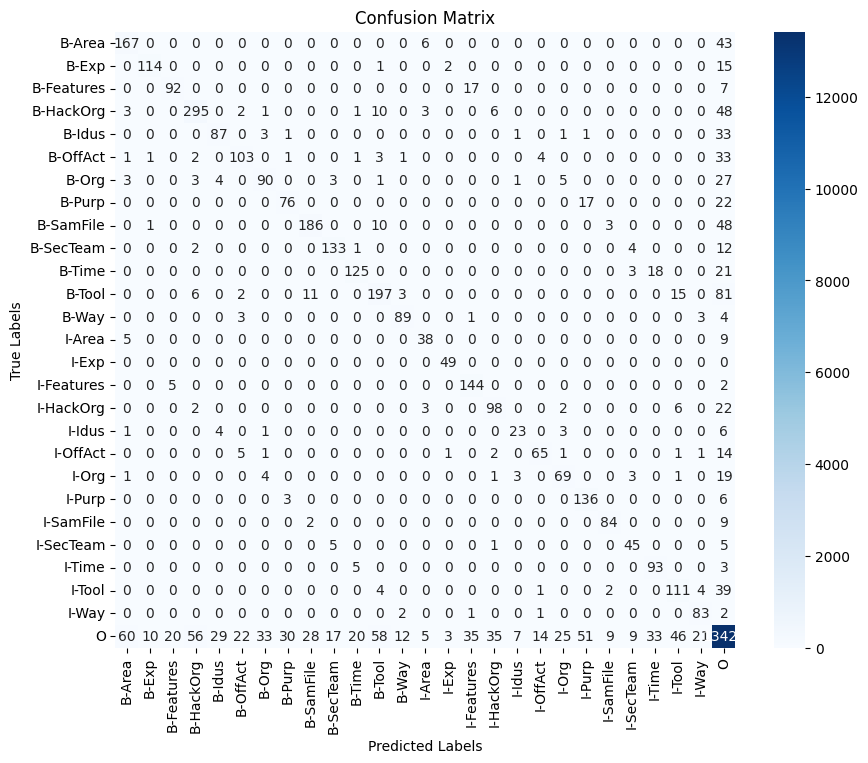

In [21]:
# i want confusion matrix

y_true = np.array(y_true)
y_pred = np.array(y_pred)
labels = np.unique(y_true)




# Generate the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set the labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()




#### map the from dnrti to Category

In [22]:
with open('dnrti_to_category.json', 'r') as file:
    dnrti_to_category = json.load(file)

In [23]:
y_true_category = [f"{x.split('-')[0]}-{dnrti_to_category.get(x.split('-')[1], 'O')}" if x != 'O' else 'O' for x in y_true]
y_pred_category = [f"{x.split('-')[0]}-{dnrti_to_category.get(x.split('-')[1], 'O')}" if x != 'O' else 'O' for x in y_pred]
labels_category = np.unique(y_true_category)

In [24]:
precision_cat = precision_score(y_true_category, y_pred_category, average='weighted')
recall_cat = recall_score(y_true_category, y_pred_category, average='weighted')

print("precision_cat:", precision_cat)
print("recall_cat:", recall_cat)

precision_cat: 0.9190578426444063
recall_cat: 0.9162903589975163


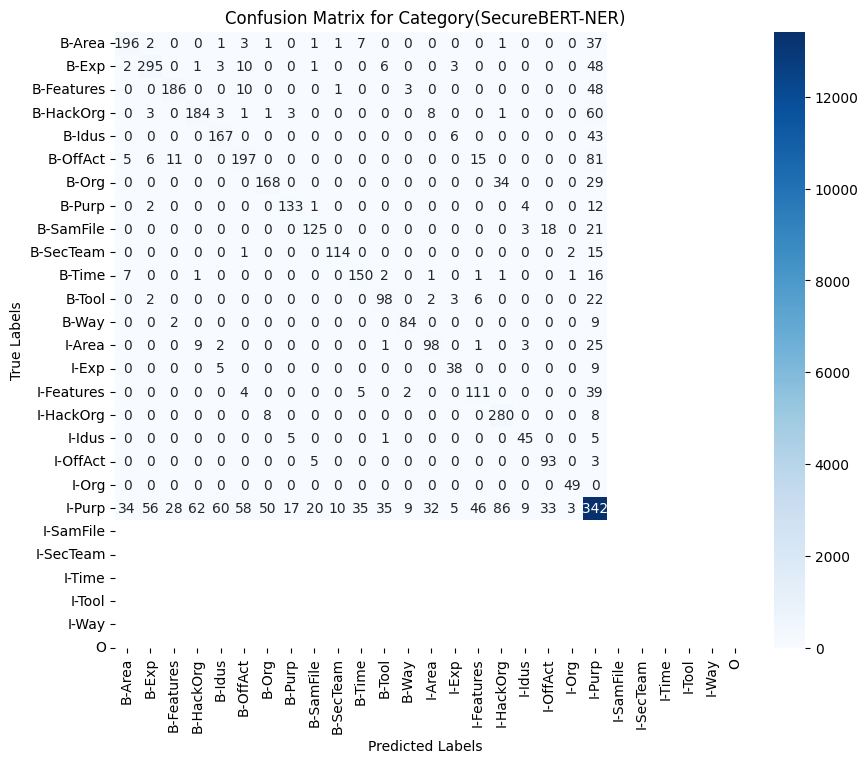

In [25]:
cf_matrix= confusion_matrix(y_true_category, y_pred_category, labels=labels_category)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set the labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Category(SecureBERT-NER)')

# Show the plot
plt.show()


In [26]:
# i want do map 